In [ ]:
# Step 1: Importing Required Libraries
# In this step, we import the Python libraries we need for data analysis and visualization.

import pandas as pd #reading CSV/Excel files, and working with tables (DataFrames)
import matplotlib.pyplot as plt #for creating static visualizations
import seaborn as sns

In [ ]:
from google.colab import drive  # Import the Colab library that allows interaction with Google Drive
drive.mount('/content/drive') # Mounts your Google Drive to the specified path in the Colab environment

Mounted at /content/drive


In [ ]:
# data collection
df=pd.read_csv('/content/drive/MyDrive/london_houssees.csv') #reads the CSV file from Drive into a DataFrame.

In [ ]:
df.head() #Displaying the First 5 Rows of the Dataset

,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2.0,3.0,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2.0,1.0,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5.0,3.0,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5.0,1.0,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4.0,1.0,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [ ]:
# Step 2: Data Cleaning
# Data cleaning involves handling missing values, duplicates, and incorrect data types.

print('Missing values')
df.isnull().sum() #checks how many missing values in the datDataFramea and shows the total count per column

Missing values


,0
Address,0
Neighborhood,0
Bedrooms,7
Bathrooms,3
Square Meters,0
Building Age,0
Garden,0
Garage,0
Floors,0
Property Type,0


In [ ]:
df['Bathrooms'] = df['Bathrooms'].fillna(df['Bathrooms'].mean()) #Handling Missing Values
df['Bedrooms'] = df['Bedrooms'].fillna(df['Bedrooms'].mean())

In [ ]:
print('Number of duplicate rows')
print(df.duplicated().sum()) #checks how many duplicated exist

Number of duplicate rows
1


In [ ]:
df.drop_duplicates(inplace=True) #Handling duplicated Values

In [ ]:
print('Data types of each column')
print(df.dtypes) #Displaying the data type

Data types of each column
Address             object
Neighborhood        object
Bedrooms           float64
Bathrooms          float64
Square Meters        int64
Building Age         int64
Garden              object
Garage              object
Floors               int64
Property Type       object
Heating Type        object
Balcony             object
Interior Style      object
View                object
Materials           object
Building Status     object
Price (£)            int64
dtype: object


In [ ]:
df['Garden'] = df['Garden'].astype('category') #convert data type
df['Garage'] = df['Garage'].astype('category')

In [ ]:
print('Cleaned data')
display(df) #Display cleaned dataset after fixing nulls, duplicates, and data types

Cleaned data


,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2.0,3.0,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2.0,1.0,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5.0,3.0,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5.0,1.0,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4.0,1.0,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44 Camden High Street,Westminster,1.0,3.0,81,4,Yes,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Modern,Street,Laminate Flooring,Renovated,1166400
996,165 Park Lane,Camden,1.0,1.0,65,51,No,No,1,Apartment,Underfloor Heating,No Balcony,Industrial,Garden,Wood,Old,563333
997,99 Camden High Street,Camden,4.0,1.0,191,27,No,Yes,2,Semi-Detached,Central Heating,Low-level Balcony,Minimalist,Park,Laminate Flooring,Old,1986399
998,155 Park Lane,Camden,5.0,2.0,131,3,Yes,No,2,Detached House,Underfloor Heating,High-level Balcony,Modern,Park,Laminate Flooring,Renovated,1703000


In [ ]:
# Step 3: Data Analysis
df.describe() #Getting Summary Statistics for Numeric Columns

,Bedrooms,Bathrooms,Square Meters,Building Age,Floors,Price (£)
count,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02
mean,3.007071,2.004019,149.675676,49.968969,1.991992,1.841113e+06
std,1.386649,0.807023,58.064860,29.085150,0.821758,8.797356e+05
min,1.000000,1.000000,50.000000,1.000000,1.000000,3.866660e+05
25%,2.000000,1.000000,99.000000,24.000000,1.000000,1.158800e+06
50%,3.000000,2.000000,148.000000,50.000000,2.000000,1.726399e+06
75%,4.000000,3.000000,201.000000,76.000000,3.000000,2.391000e+06
max,5.000000,3.000000,249.000000,99.000000,3.000000,4.980000e+06


In [ ]:
df.info() #Getting an Overview of the Dataset Structure

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Address          999 non-null    object  
 1   Neighborhood     999 non-null    object  
 2   Bedrooms         999 non-null    float64 
 3   Bathrooms        999 non-null    float64 
 4   Square Meters    999 non-null    int64   
 5   Building Age     999 non-null    int64   
 6   Garden           999 non-null    category
 7   Garage           999 non-null    category
 8   Floors           999 non-null    int64   
 9   Property Type    999 non-null    object  
 10  Heating Type     999 non-null    object  
 11  Balcony          999 non-null    object  
 12  Interior Style   999 non-null    object  
 13  View             999 non-null    object  
 14  Materials        999 non-null    object  
 15  Building Status  999 non-null    object  
 16  Price (£)        999 non-null    int64   
dtypes:

In [ ]:
print('Value counts for Materials:')
print(df['Materials'].value_counts()) #counts how many times each unique value in 'Materials' appears

Value counts for Materials:
Materials
Wood                 264
Laminate Flooring    257
Marble               243
Granite              235
Name: count, dtype: int64


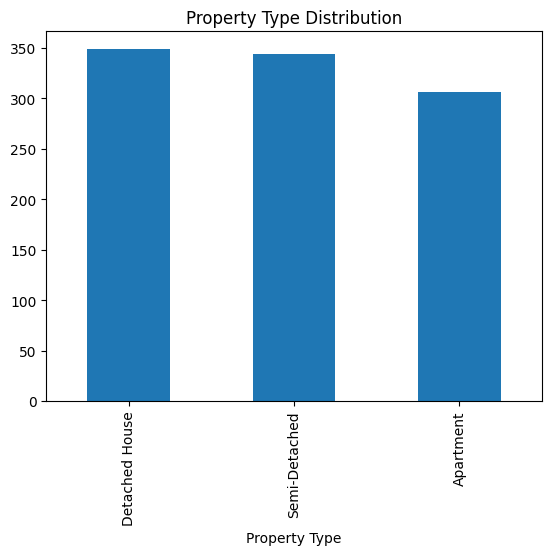

In [ ]:
# Step 4: Data Visualization
df["Property Type"].value_counts().plot(kind="bar") #Counts each property type and plots the result as a bar chart
plt.title("Property Type Distribution") # Add a title to the chart
plt.show() # Show the plot

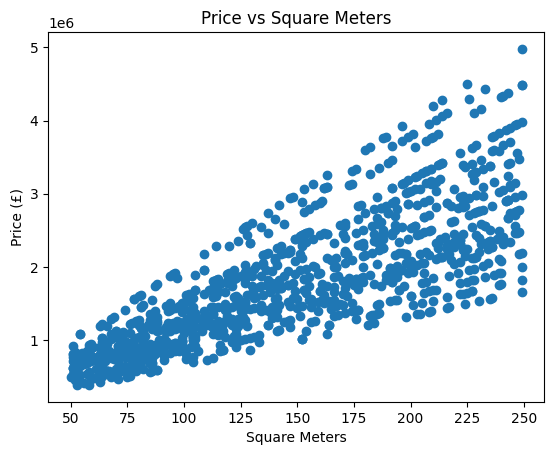

In [ ]:
plt.scatter(df["Square Meters"], df["Price (£)"]) # Creates a scatter plot with Square Meters on x-axis and Price on y-axis
plt.xlabel("Square Meters")  # Labels the x-axis
plt.ylabel("Price (£)") # Labels the y-axis
plt.title("Price vs Square Meters")
plt.show()

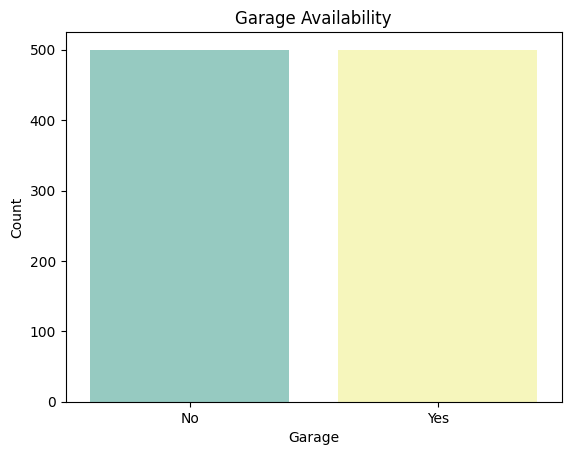

In [ ]:
sns.countplot(x="Garage", data=df, hue="Garage", palette="Set3", legend=False) # Creates a bar plot counting occurrences of each category in 'Garage'
# 'palette' sets the color scheme
# 'legend=False' hides the legend since hue is same as x
plt.title("Garage Availability")
plt.xlabel("Garage")
plt.ylabel("Count")
plt.show()

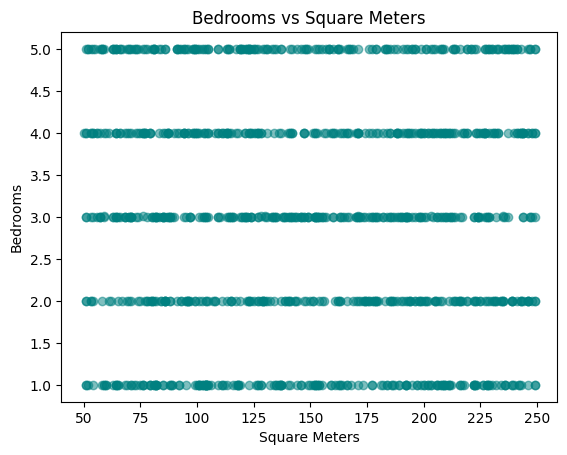

In [ ]:
plt.scatter(df["Square Meters"], df["Bedrooms"], alpha=0.5, color="teal") # Creates a scatter plot with 'Square Meters' on the x-axis and 'Bedrooms' on the y-axis
# alpha=0.5 makes the points semi-transparent (useful when points overlap)
# color="teal" sets the color of the points to teal
plt.xlabel("Square Meters")
plt.ylabel("Bedrooms")
plt.title("Bedrooms vs Square Meters")
plt.show()